# Proyecto Trading
Lucía Cordero - 100451776 | Jorge Garcelán - 100442062

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fundamentals_df = pd.read_csv("fundamentals_dji.csv", index_col=0)

# Transponemos el DataFrame: filas pasan a columnas y viceversa
fundamentals_df = fundamentals_df.T

# Eliminar columna 'ticker'
fundamentals_df.drop("ticker", axis=1, inplace=True)
fundamentals_df.drop("MostRecentQuarter", axis=1, inplace=True)
fundamentals_df

,MarketCapitalization,MarketCapitalizationMln,EBITDA,PERatio,PEGRatio,WallStreetTargetPrice,BookValue,DividendShare,DividendYield,EarningsShare,...,ProfitMargin,OperatingMarginTTM,ReturnOnAssetsTTM,ReturnOnEquityTTM,RevenueTTM,RevenuePerShareTTM,QuarterlyRevenueGrowthYOY,GrossProfitTTM,DilutedEpsTTM,QuarterlyEarningsGrowthYOY
INTC.US,127067570176,127067.5702,10501000192,30.7732,0.4346,39.74,24.894,0.5,0.0168,0.97,...,0.0736,-0.0567,0.0024,0.0379,55237001216,13.114,0.086,26866000000,0.97,-0.717
HON.US,132138655744,132138.6557,8920999936,23.5406,2.013,219.12,25.268,4.22,0.0213,8.62,...,0.1552,0.2226,0.077,0.332,36902998016,55.988,0.027,11641000000,8.62,0.077
MCD.US,198187548672,198187.5487,13809500160,23.3645,1.9285,316.08,-6.706,6.38,0.0243,11.77,...,0.3336,0.4421,0.1399,0,25764700160,35.507,0.046,13207200000,11.77,0.086
KO.US,272521527296,272521.5273,14654999552,25.4056,2.9336,67.43,6.135,1.865,0.0307,2.49,...,0.2341,0.3297,0.0861,0.3931,46073999360,10.668,0.029,25004000000,2.49,0.026
GS.US,146633605120,146633.6051,NaN,17.7283,3.1437,450.01,314.474,10.75,0.0242,25.65,...,0.2015,0.3786,0.0058,0.0794,46726000640,138.222,0.121,37530000000,25.65,0.318
NKE.US,137261203456,137261.2035,6862000128,26.7471,2.0302,109.72,9.415,1.42,0.0163,3.4,...,0.1014,0.1075,0.0989,0.3638,51581001728,33.831,0.003,21479000000,3.4,-0.025
PG.US,393789374464,393789.3745,24217999360,27.2631,3.2845,171.47,20.87,3.763,0.0241,6.12,...,0.1799,0.2294,0.1116,0.3179,84059996160,35.616,0.006,39246000000,6.12,0.106
JPM.US,570801848320,570801.8483,NaN,11.9885,3.3555,206.28,106.815,4.25,0.0231,16.58,...,0.3357,0.4522,0.0129,0.1574,150000992256,51.308,0.111,122306000000,16.58,0.083
CSCO.US,194604072960,194604.073,17671000064,14.6079,3.4315,53.73,11.42,1.56,0.0333,3.29,...,0.2349,0.243,0.102,0.3065,57232998400,14.067,-0.059,35753000000,3.29,-0.031
CVX.US,305601282048,305601.282,41230999552,15.2408,4.5062,183.42,86.965,6.16,0.0393,10.88,...,0.1053,0.1391,0.0615,0.1264,192786006016,103.611,-0.041,98886000000,10.88,-0.142


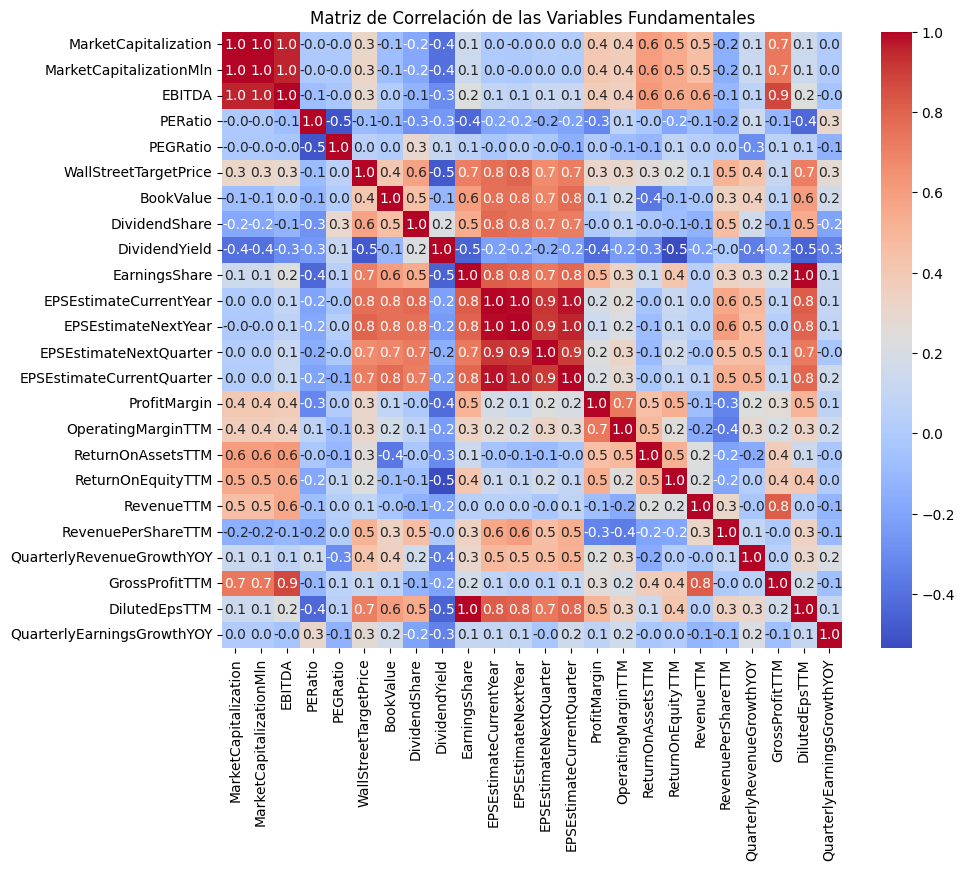

In [7]:
# Calculamos la matriz de correlación (solo columnas numéricas)
corr_matrix = fundamentals_df.corr()

# Visualizamos la matriz de correlación con un heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Matriz de Correlación de las Variables Fundamentales")
plt.show()


## 1.  Aplicar un método de clustering a los componentes del Dow Jones usando algunas de las variables fundamentales (fichero fundamentals_dji.csv).

En el Anexo 1 tenéis la descripción de estas variables. De esta manera dividimos el índice en grupos de empresas que son parecidas.  

- Al menos usad 5 grupos. 
- Al menos usad 3 variables para hacer el clustering, esto es, elegid al menos 3 features de entre todas las que os ofrece el fichero con la info de fundamentales.

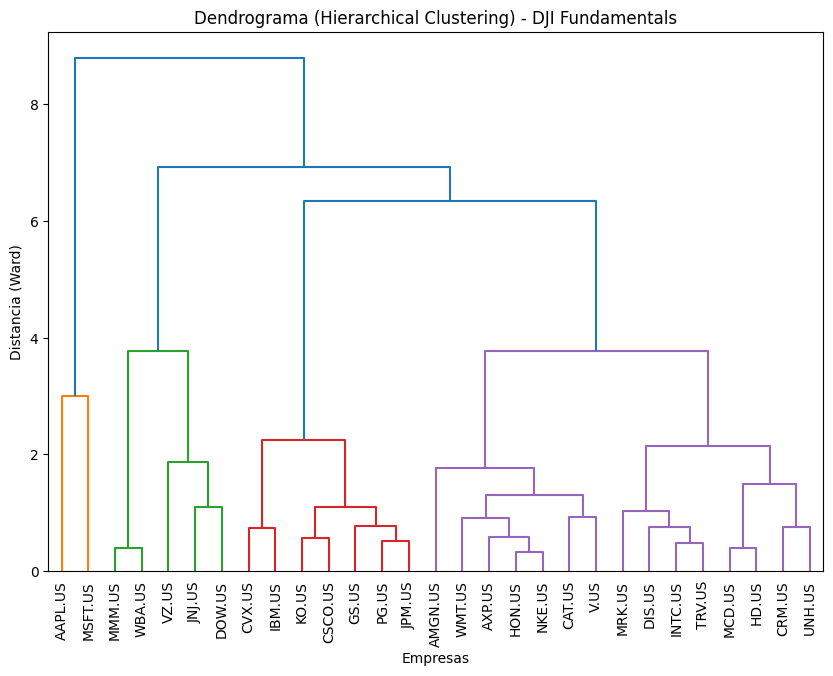

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

# (1) Selecciona las columnas y escala
features = ['MarketCapitalizationMln', 'PEGRatio', 'ReturnOnEquityTTM', 'DividendYield']
X = fundamentals_df[features].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (2) Realiza el clustering jerárquico con 5 clusters
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
clusters = hc.fit_predict(X_scaled)
X['Cluster_HC'] = clusters  # Guardamos la asignación en el DataFrame

# (3) Calcula la linkage matrix para graficar el dendrograma
Z = linkage(X_scaled, method='ward')

# (4) Grafica el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(
    Z,
    labels=X.index,          # Para que aparezcan los nombres de las empresas
    orientation='top',
    leaf_rotation=90,        # Rotamos las etiquetas si hay muchas
)
plt.title("Dendrograma (Hierarchical Clustering) - DJI Fundamentals")
plt.xlabel("Empresas")
plt.ylabel("Distancia (Ward)")
plt.show()


In [47]:
print(X)

        MarketCapitalizationMln PEGRatio ReturnOnEquityTTM DividendYield  \
INTC.US             127067.5702   0.4346            0.0379        0.0168   
HON.US              132138.6557    2.013             0.332        0.0213   
MCD.US              198187.5487   1.9285                 0        0.0243   
KO.US               272521.5273   2.9336            0.3931        0.0307   
GS.US               146633.6051   3.1437            0.0794        0.0242   
NKE.US              137261.2035   2.0302            0.3638        0.0163   
PG.US               393789.3745   3.2845            0.3179        0.0241   
JPM.US              570801.8483   3.3555            0.1574        0.0231   
CSCO.US              194604.073   3.4315            0.3065        0.0333   
CVX.US               305601.282   4.5062            0.1264        0.0393   
AAPL.US            2806907.1421    2.209            1.4725        0.0055   
TRV.US               50034.9706   0.8237            0.1306        0.0192   
CRM.US      

## 2. Elegid de cada grupo dos acciones para aplicar la estrategia de pairs trading 

## 3. Elegid un intervalo de entre 3 y 5 años de todos los disponibles para el estudio

In [27]:
import pandas as pd
import numpy as np
from itertools import combinations
from statsmodels.tsa.stattools import coint

# Función para cargar la serie de precios ajustados para un ticker
def load_company_series(ticker, start_date, end_date):
    """
    Carga el CSV de una empresa filtrando entre start_date y end_date.
    """
    # Extraemos la parte antes del punto
    base_ticker = ticker.split('.')[0]
    filename = f"csvs/{base_ticker}_US_datos.csv"
    try:
        df = pd.read_csv(filename, parse_dates=['date'], index_col='date')
        df = df.loc[start_date:end_date]
        return df['adjusted_close'].rename(ticker)
    except Exception as e:
        print(f"Error al cargar {ticker} (archivo {filename}): {e}")
        return None


# Función para calcular el p-value de cointegración entre dos series
def cointegration_pvalue(series1, series2):
    """
    Alinea las dos series por fecha y calcula el p-value del test de cointegración.
    """
    df_pair = pd.concat([series1, series2], axis=1, join='inner').dropna()
    score, pvalue, _ = coint(df_pair.iloc[:, 0], df_pair.iloc[:, 1])
    return pvalue

# Función que, dado un listado de tickers (empresa) y un diccionario con sus series,
# evalúa todas las combinaciones de dos y retorna el par con el menor p-value.
def select_best_pair_for_cluster(companies, price_series):
    best_pair = None
    best_pvalue = 1.0  # valor máximo posible para el p-value
    for c1, c2 in combinations(companies, 2):
        if c1 in price_series and c2 in price_series:
            pvalue = cointegration_pvalue(price_series[c1], price_series[c2])
            if pvalue is not None and pvalue < best_pvalue:
                best_pvalue = pvalue
                best_pair = (c1, c2)
    if best_pair is not None:
        return best_pair, best_pvalue
    else:
        return None

# Función para procesar todos los clusters:
def select_best_pairs_by_cluster(clusters_dict, start_date, end_date, min_obs=30):
    """
    Dado un diccionario de clusters (clave = cluster, valor = lista de tickers),
    carga las series de precios para cada ticker y, para cada cluster, selecciona el par
    con menor p-value de cointegración.
    
    Retorna un diccionario: { cluster: ( (ticker1, ticker2), pvalue ) }.
    """
    # Primero, cargamos las series de todos los tickers
    price_series = {}
    all_tickers = {ticker for tickers in clusters_dict.values() for ticker in tickers}
    for ticker in all_tickers:
        series = load_company_series(ticker, start_date, end_date)
        if series is not None:
            price_series[ticker] = series

    selected_pairs = {}
    for cluster, companies in clusters_dict.items():
        if len(companies) < 2:
            print(f"Cluster {cluster} tiene menos de 2 empresas. Se omite.")
            continue
        result = select_best_pair_for_cluster(companies, price_series, min_obs)
        if result is not None:
            selected_pairs[cluster] = result
    return selected_pairs

In [28]:
# Convertimos a diccionario:
clusters_dict = X.groupby('Cluster_HC').apply(lambda df: df.index.tolist()).to_dict()

# Definimos el rango de fechas
start_date = "2013-01-01"
end_date   = "2018-12-31"

# Obtenemos los mejores pares por cluster basados en cointegración
selected_pairs = select_best_pairs_by_cluster(clusters_dict, start_date, end_date, min_obs=30)

# Imprimimos los resultados:
for cluster, (pair, pvalue) in selected_pairs.items():
    print(f"Cluster {cluster}: {pair} (p-value: {pvalue:.4f})")

/var/folders/dh/_ks73kfn57l67vxm7b5y16qw0000gn/T/ipykernel_5546/2150155736.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clusters_dict = X.groupby('Cluster_HC').apply(lambda df: df.index.tolist()).to_dict()


            Unnamed: 0    open    high     low   close  adjusted_close  \
date                                                                     
2013-01-02        2265   71.02   71.02   70.30   70.84         52.7890   
2013-01-03        2266   70.98   71.00   70.45   70.74         52.7145   
2013-01-04        2267   71.24   71.73   71.01   71.55         53.3181   
2013-01-07        2268   71.50   71.53   71.19   71.40         53.2063   
2013-01-08        2269   71.31   71.65   71.25   71.41         53.2137   
...                ...     ...     ...     ...     ...             ...   
2018-12-24        3770  127.30  128.00  121.00  122.84        108.1500   
2018-12-26        3771  123.42  126.76  122.01  126.71        111.5572   
2018-12-27        3772  125.87  127.41  123.07  127.41        112.1735   
2018-12-28        3773  127.91  128.75  126.75  127.27        112.0502   
2018-12-31        3774  128.18  129.55  127.42  129.05        113.6174   

              volume  
date          

### Grupo 0

In [29]:
MMM_US = pd.read_csv("csvs/MMM_US_datos.csv")
JNJ_US = pd.read_csv("csvs/JNJ_US_datos.csv")

            Unnamed: 0    open    high     low   close  adjusted_close  \
date                                                                     
2013-01-02        2265   94.19   94.79   93.96   94.78         67.8951   
2013-01-03        2266   94.34   94.93   94.13   94.67         67.8163   
2013-01-04        2267   94.79   95.48   94.54   95.37         68.3178   
2013-01-07        2268   95.02   95.73   94.76   95.49         68.4037   
2013-01-08        2269   95.17   95.75   95.10   95.50         68.4109   
...                ...     ...     ...     ...     ...             ...   
2018-12-24        3770  181.89  183.54  178.51  178.62        148.3692   
2018-12-26        3771  179.38  186.33  176.87  186.26        154.7153   
2018-12-27        3772  183.50  190.70  182.88  190.70        158.4034   
2018-12-28        3773  191.81  192.30  188.57  189.37        157.2986   
2018-12-31        3774  190.34  191.65  188.50  190.54        158.2705   

             volume  
date           

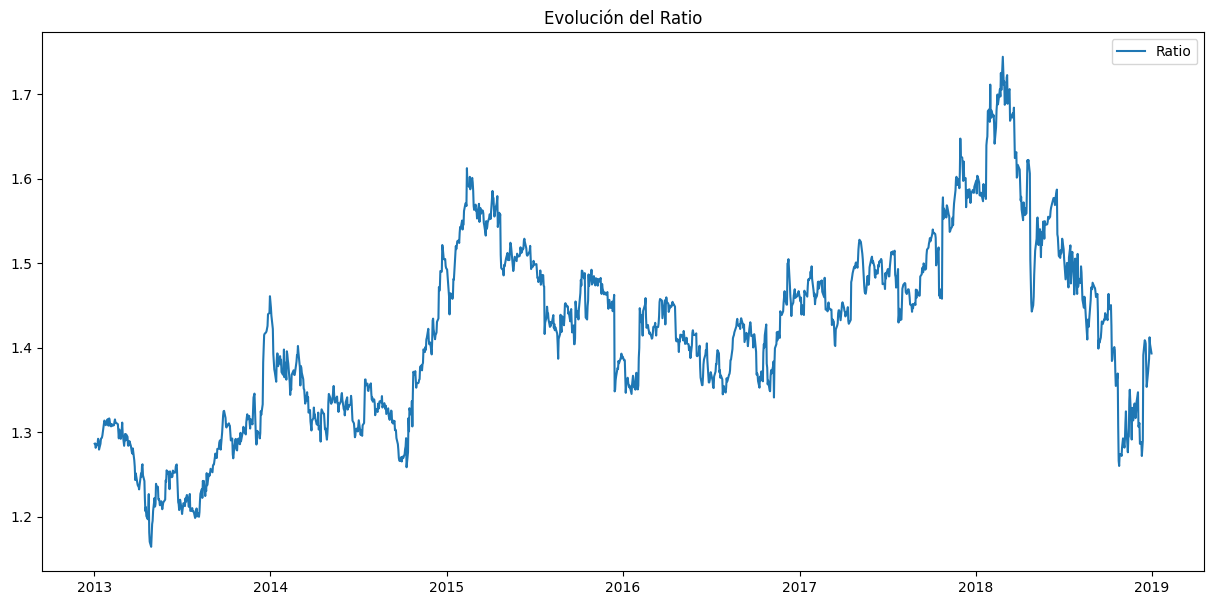

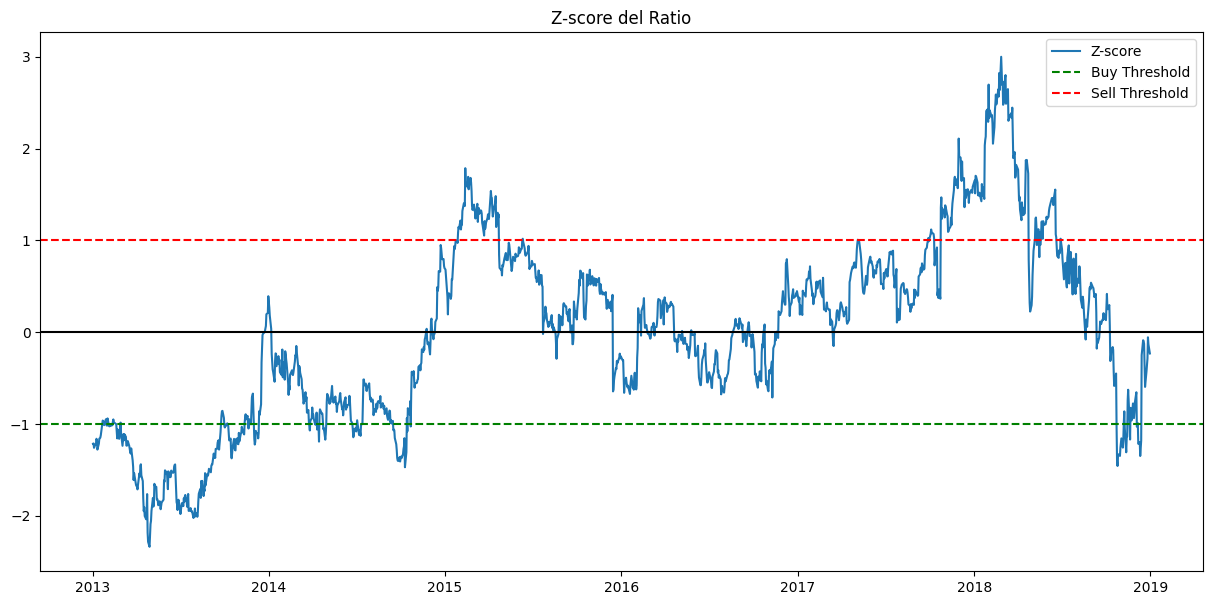

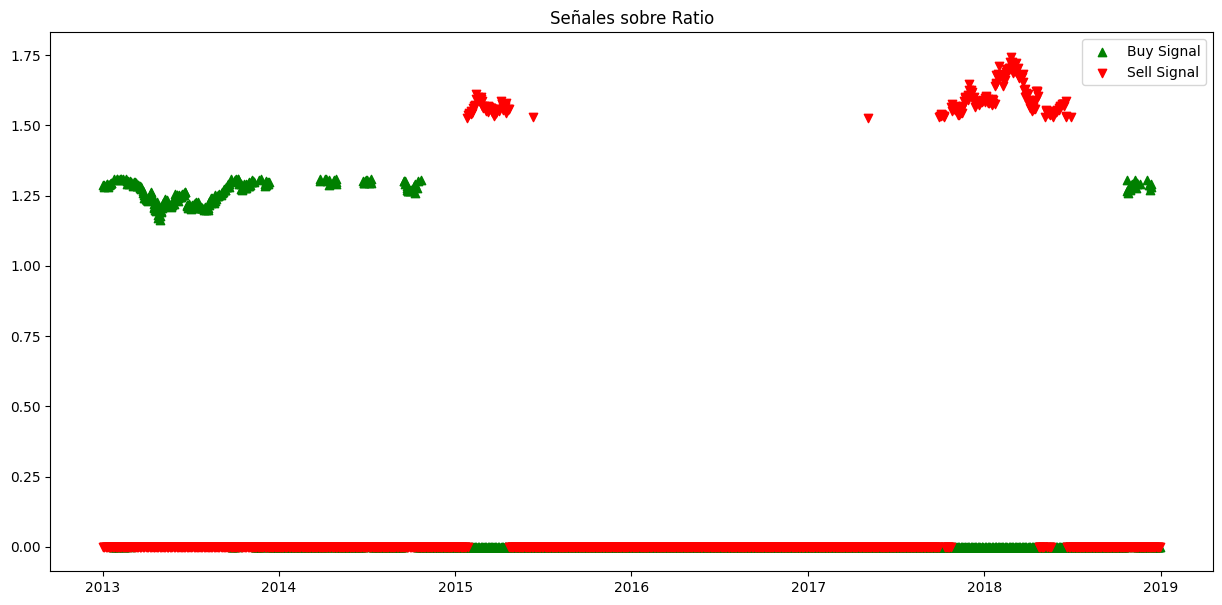

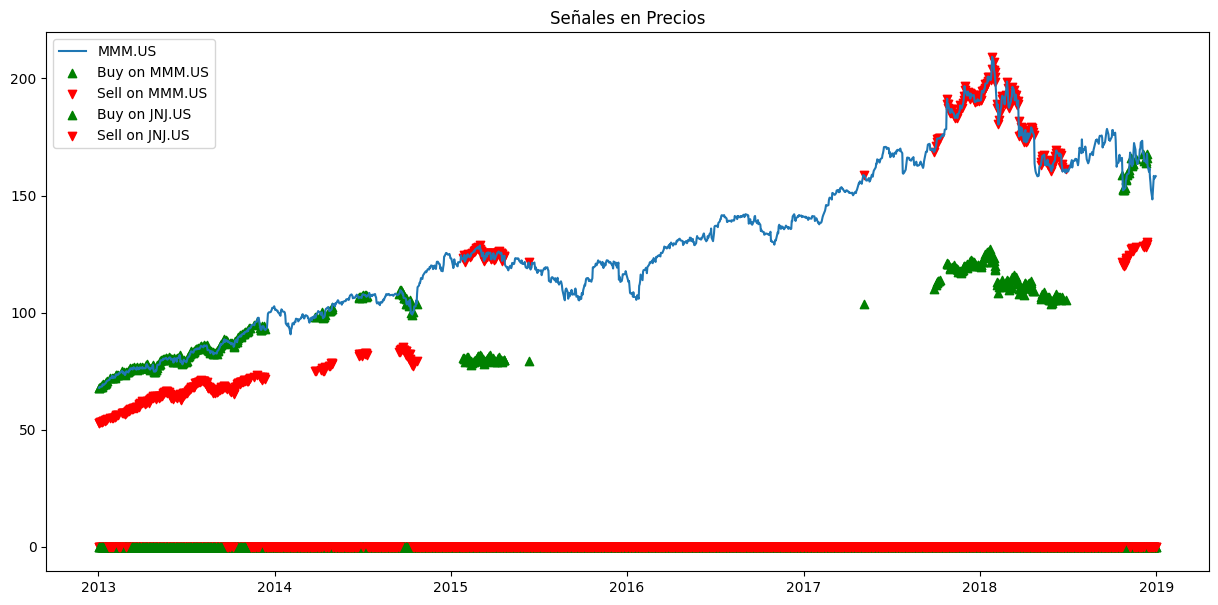

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

def zscore(series):
    return (series - series.mean()) / np.std(series)

def pairs_trading_strategy_ratio_buy_sell(ticker1, ticker2, start_date, end_date, entry_threshold=1.0, data_folder="csvs"):
 
    # Cargar series usando load_company_series (la función utiliza internamente la carpeta "csvs")
    series1 = load_company_series(ticker1, start_date, end_date)
    series2 = load_company_series(ticker2, start_date, end_date)
    
    if series1 is None or series2 is None:
        print("Error al cargar los datos de uno o ambos tickers.")
        return None
    
    # Alinear las series por fecha
    data = pd.concat([series1, series2], axis=1, join='inner')
    data.columns = [ticker1, ticker2]
    
    # Calcular el ratio
    data['ratio'] = data[ticker1] / data[ticker2]
    
    # Calcular la zscore del ratio
    data['zscore'] = zscore(data['ratio'])
    
    # Generar señales para el ratio:
    # Creamos copias para señales de compra y venta sin rellenar
    data['buy'] = data['ratio'].copy()
    data['sell'] = data['ratio'].copy()
    # En el ejemplo: se compra cuando zscore < -entry_threshold y se vende cuando zscore > entry_threshold.
    # Aquí se ponen a 0 los valores que no generan señal.
    data.loc[data['zscore'] > -entry_threshold, 'buy'] = 0
    data.loc[data['zscore'] < entry_threshold, 'sell'] = 0
    
    # Generar señales sobre los precios de cada ticker:
    data['symbol1_buy'] = data[ticker1].copy()
    data['symbol1_sell'] = data[ticker1].copy()
    data['symbol2_buy'] = data[ticker2].copy()
    data['symbol2_sell'] = data[ticker2].copy()
    
    data.loc[data['zscore'] > -entry_threshold, 'symbol1_buy'] = 0
    data.loc[data['zscore'] < entry_threshold, 'symbol1_sell'] = 0
    data.loc[data['zscore'] < entry_threshold, 'symbol2_buy'] = 0
    data.loc[data['zscore'] > -entry_threshold, 'symbol2_sell'] = 0

    # Visualización de los resultados:
    plt.figure(figsize=(15,7))
    plt.title("Evolución del Ratio")
    plt.plot(data.index, data['ratio'], label='Ratio')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.title("Z-score del Ratio")
    plt.plot(data.index, data['zscore'], label='Z-score')
    plt.axhline(-entry_threshold, color='green', linestyle='--', label='Buy Threshold')
    plt.axhline(entry_threshold, color='red', linestyle='--', label='Sell Threshold')
    plt.axhline(0, color='black')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.title("Señales sobre Ratio")
    plt.plot(data.index, data['ratio'], label='Ratio')
    plt.scatter(data.index, data['buy'], color='green', marker='^', label='Buy Signal')
    plt.scatter(data.index, data['sell'], color='red', marker='v', label='Sell Signal')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,7))
    plt.title("Señales en Precios")
    plt.plot(data.index, data[ticker1], label=ticker1)
    plt.scatter(data.index, data['symbol1_buy'], color='green', marker='^', label='Buy on ' + ticker1)
    plt.scatter(data.index, data['symbol1_sell'], color='red', marker='v', label='Sell on ' + ticker1)
    plt.plot(data.index, data[ticker2], label=ticker2)
    plt.scatter(data.index, data['symbol2_buy'], color='green', marker='^', label='Buy on ' + ticker2)
    plt.scatter(data.index, data['symbol2_sell'], color='red', marker='v', label='Sell on ' + ticker2)
    plt.legend()
    plt.show()
    
    return data

# Ejemplo de uso:
start_date = "2013-01-01"
end_date = "2018-12-31"
result_df = pairs_trading_strategy_ratio_buy_sell("MMM.US", "JNJ.US", start_date, end_date, entry_threshold=1.0, data_folder="csvs")

## 4.  Comparad las PnL obtenidas por cada par, intentad explicar las diferencias en estos  resultados mirando los grupos que se han creado